# #TDI CAPSTONE PROPOSAL

# ANALYSIS OF CUSTOMER BEHAVIOUR ON ECOMMERCE WEBSITE

The following is proposal for a predictive model on behaviour of customers on an ecommerce website

In [77]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import datetime as dt
import matplotlib.dates as md
import copy
%matplotlib inline

In [78]:
#Load data and have a look at it
#df = pd.read_csv(r'C:\Users\Hello\Documents\TDI\DOB_Job_Application_Filings.csv', error_bad_lines=False)
df = pd.read_csv(r'C:\Users\Hello\Downloads\2020-Mar.csv\2020-Mar.csv', nrows=1000000)
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-03-01 00:00:00 UTC,view,10900348,2232732105912091273,appliances.kitchen.mixer,kitfort,117.63,550295099,23f5ab9e-7774-416d-900b-f2725da671aa
1,2020-03-01 00:00:01 UTC,view,14300020,2232732107967300275,apparel.underwear,casio,264.37,622070532,edf19213-f0dd-46e1-ae18-28968dbddd6e
2,2020-03-01 00:00:03 UTC,view,13200063,2232732061804790604,furniture.bedroom.bed,NaN,126.10,552832344,608087d8-6b69-21db-50a3-2b91ba015532
3,2020-03-01 00:00:03 UTC,view,100077498,2232732085846540487,construction.tools.generator,tamina,424.72,613391860,5ab6c3d5-edd7-4e15-8b0a-75b467a37fd0
4,2020-03-01 00:00:04 UTC,view,1005014,2232732093077520756,construction.tools.light,samsung,482.73,517021211,0c34308d-c455-40bb-9992-3e44920bc2b9


In [79]:
#Ensuring that Pre-Filing Date column is in Date Format 
df['event_time'] = pd.to_datetime(df['event_time'])

df['date'] = df['event_time'].dt.strftime('%d/%m/%Y')
df['time'] = df['event_time'].dt.strftime('%H:%M:%S')

In [52]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time
0,2020-03-01 00:00:00+00:00,view,10900348,2232732105912091273,appliances.kitchen.mixer,kitfort,117.63,550295099,23f5ab9e-7774-416d-900b-f2725da671aa,01/03/2020,00:00:00
1,2020-03-01 00:00:01+00:00,view,14300020,2232732107967300275,apparel.underwear,casio,264.37,622070532,edf19213-f0dd-46e1-ae18-28968dbddd6e,01/03/2020,00:00:01
2,2020-03-01 00:00:03+00:00,view,13200063,2232732061804790604,furniture.bedroom.bed,NaN,126.10,552832344,608087d8-6b69-21db-50a3-2b91ba015532,01/03/2020,00:00:03
3,2020-03-01 00:00:03+00:00,view,100077498,2232732085846540487,construction.tools.generator,tamina,424.72,613391860,5ab6c3d5-edd7-4e15-8b0a-75b467a37fd0,01/03/2020,00:00:03
4,2020-03-01 00:00:04+00:00,view,1005014,2232732093077520756,construction.tools.light,samsung,482.73,517021211,0c34308d-c455-40bb-9992-3e44920bc2b9,01/03/2020,00:00:04


In [53]:
df.info

<bound method DataFrame.info of                       event_time event_type  product_id          category_id  \
0      2020-03-01 00:00:00+00:00       view    10900348  2232732105912091273   
1      2020-03-01 00:00:01+00:00       view    14300020  2232732107967300275   
2      2020-03-01 00:00:03+00:00       view    13200063  2232732061804790604   
3      2020-03-01 00:00:03+00:00       view   100077498  2232732085846540487   
4      2020-03-01 00:00:04+00:00       view     1005014  2232732093077520756   
...                          ...        ...         ...                  ...   
999995 2020-03-01 13:58:40+00:00       view     3700677  2232732101063475749   
999996 2020-03-01 13:58:40+00:00       view    26201130  2232732081585127530   
999997 2020-03-01 13:58:40+00:00       view   100093524  2053013563835941749   
999998 2020-03-01 13:58:40+00:00       view     2800594  2232732091307524418   
999999 2020-03-01 13:58:40+00:00       view     1002544  2232732093077520756   

       

In [68]:
df.shape

(1000000, 12)

In [13]:
#fixing the messy column names
#df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [54]:
df['Unix_time'] = df['event_time'].astype('int64')//1e9

In [55]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,Unix_time
0,2020-03-01 00:00:00+00:00,view,10900348,2232732105912091273,appliances.kitchen.mixer,kitfort,117.63,550295099,23f5ab9e-7774-416d-900b-f2725da671aa,01/03/2020,00:00:00,1583020800
1,2020-03-01 00:00:01+00:00,view,14300020,2232732107967300275,apparel.underwear,casio,264.37,622070532,edf19213-f0dd-46e1-ae18-28968dbddd6e,01/03/2020,00:00:01,1583020801
2,2020-03-01 00:00:03+00:00,view,13200063,2232732061804790604,furniture.bedroom.bed,NaN,126.10,552832344,608087d8-6b69-21db-50a3-2b91ba015532,01/03/2020,00:00:03,1583020803
3,2020-03-01 00:00:03+00:00,view,100077498,2232732085846540487,construction.tools.generator,tamina,424.72,613391860,5ab6c3d5-edd7-4e15-8b0a-75b467a37fd0,01/03/2020,00:00:03,1583020803
4,2020-03-01 00:00:04+00:00,view,1005014,2232732093077520756,construction.tools.light,samsung,482.73,517021211,0c34308d-c455-40bb-9992-3e44920bc2b9,01/03/2020,00:00:04,1583020804


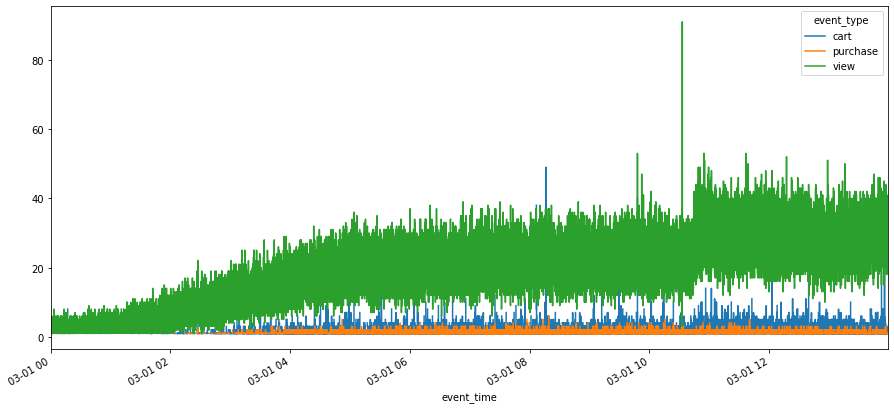

In [56]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['event_time','event_type']).count()['price'].unstack().plot(ax=ax)

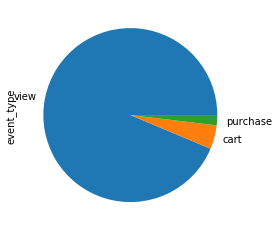

In [57]:
df['event_type'].value_counts().plot(kind='pie')

In [69]:
unique_customers = df['user_id'].nunique()
print ("Number of unique customers: {}".format(unique_customers))

Number of unique customers: 193873


In [74]:

#What customers buy the most
purchase = df.loc[df['event_type'] == 'purchase']
purchase = purchase.dropna(axis='rows')
purchase.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,Unix_time
7,2020-03-01 00:00:07+00:00,purchase,5100722,2232732103101907535,electronics.clocks,huawei,128.68,604860058,f558a7d7-f1e4-4b81-8799-9131a81e551b,01/03/2020,00:00:07,1583020807
71,2020-03-01 00:00:42+00:00,purchase,100082062,2232732102103663163,furniture.bedroom.blanket,arg,48.88,601908129,37473d3f-b68b-4a23-8140-c6a7dece087c,01/03/2020,00:00:42,1583020842
155,2020-03-01 00:01:11+00:00,purchase,5100610,2232732103101907535,electronics.clocks,apple,295.73,613253847,45aa30e5-2e05-4d56-ab56-07b0ecd2a0a4,01/03/2020,00:01:11,1583020871
191,2020-03-01 00:01:29+00:00,purchase,1002544,2232732093077520756,construction.tools.light,apple,397.10,622090486,a91bed93-c586-453f-bbef-74c564fc0bfe,01/03/2020,00:01:29,1583020889
263,2020-03-01 00:02:00+00:00,purchase,1004767,2232732093077520756,construction.tools.light,samsung,241.83,621784978,50d5fceb-0eee-4733-a52e-e7f00855f9f6,01/03/2020,00:02:00,1583020920


In [75]:
#Which Brand is bought the most
top_sellers = purchase.groupby('brand')['brand'].agg(['count']).sort_values('count', ascending=False)
top_sellers.head(20)


,count
brand,
samsung,4611
apple,3516
xiaomi,1674
huawei,599
lucente,399
oppo,304
lg,192
sony,160
acer,132


NameError: name 'daily_summary_table' is not defined

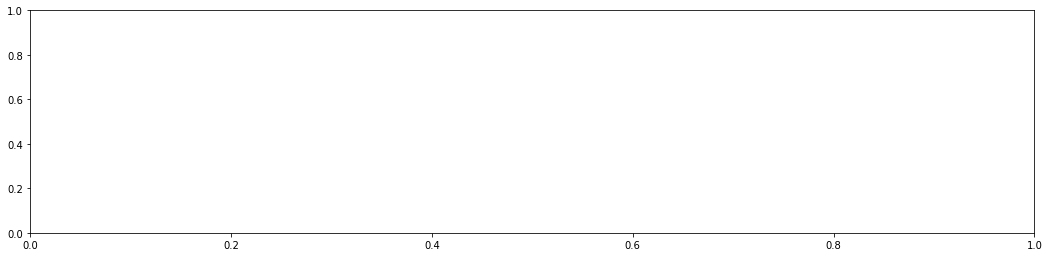

In [81]:
#Plotting number of daily visits
fig=plt.figure(figsize=(18,9))
ax1=fig.add_subplot(2,1,1)
sns.lineplot(x='event_time',
              y='Number_of_daily_visits',
              data=daily_summary_table,
             ax=ax1)
plt.title('Daily Visits')
plt.ylabel('Number of Daily Visits')
plt.xlabel('Dates')

ax2=fig.add_subplot(2,1,2)

sns.boxplot(x=daily_summary_table['event_time'].dt.dayofweek,
            y='Number_of_daily_visits',
            data=daily_summary_table,
           ax=ax2)
plt.title('Number of Visit by days')
plt.ylabel('Number of Visits')
plt.xlabel('Days')
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.tight_layout(pad=3.0);